# Temperature Test 1

In [1]:
%matplotlib inline

import disktemperature as dt
import numpy             as np
import matplotlib.pyplot as plt

from matplotlib.pyplot import style
from disktemperature.constants import R_sun,T_sun,M_sun,AU,pi,Grav,k_b,mu,m_p

style.use(['seaborn-dark',{'axes.grid': True,'font.size':18,'figure.figsize':(10,8),'lines.linewidth':2}]);

Define a disk model.

In [2]:
r        = np.logspace(np.log10(3e-2),np.log10(500),500)*AU
M_star  = M_sun
R_star  = R_sun
T_star  = T_sun
M_disk  = 0.1*M_star
alpha   = 1e-2
r_c     = 60*AU
eps     = 0.01
sig_g   = M_disk/(2*pi*r_c**2)*(r_c/r)*np.exp(-(r/r_c))
sig_g   = M_disk*sig_g/np.trapz(2*pi*r*sig_g,x=r)
sig_d_t = sig_g*eps

Initialize the mid-plane temperature model.

In [3]:
Temp = dt.tmid.tmid(_na=50,_nl=60,T_star=T_star,R_star=R_star,M_star=M_star,Tmin=10.)

Mie ... Done!


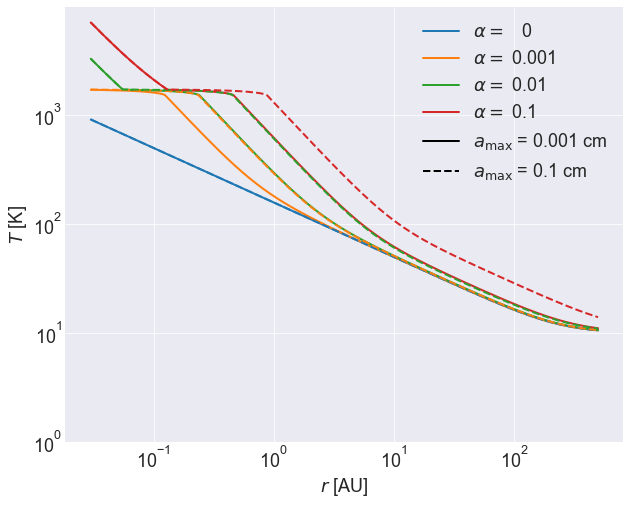

In [4]:
f,ax = plt.subplots()
#cols = brewer2mpl.get_map('Set2','Qualitative',8).mpl_colors
cols = plt.rcParams['axes.prop_cycle'].by_key()['color']

for iamax,amax in enumerate([1e-3,1e-1]):

    # Create dust size distribution
    
    a    = Temp.a*1e-4
    dist = (a*(a<amax))**0.5
    dist = dist/np.sum(dist)+1e-100
    sig_d = np.outer(dist,sig_d_t)
    sig_d = sig_d/sig_d.sum(0)*sig_d_t

    # calculate & plot temperature
    
    for ialpha,alpha in enumerate([0,1e-3,1e-2,1e-1]):

        T = Temp.get_t_mid(r,sig_g,sig_d,alpha*np.ones(r.shape))
        ax.loglog(r/AU,T,color=cols[ialpha],ls='-'+'-'*(iamax==1),\
                  label=r'$\alpha = $ {:3.2g}'.format(alpha)*(iamax==0))

    ax.plot(np.nan,np.nan,color='k',ls='-'+'-'*(iamax==1),label='$a_\mathrm{{max}}$ = {:3.2g} cm'.format(amax))
    l=ax.legend()
    ax.set_xlabel('$r$ [AU]')
    ax.set_ylabel('$T$ [K]')
    ax.set_ylim(ymin=1);

# Try to iterate to set the irradiation angle with a radial dependence.

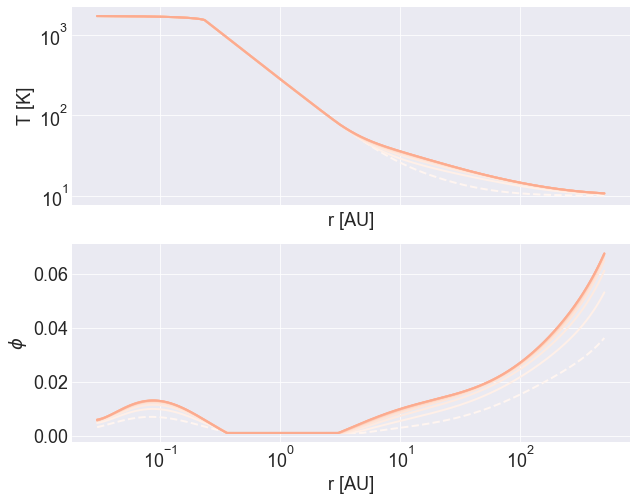

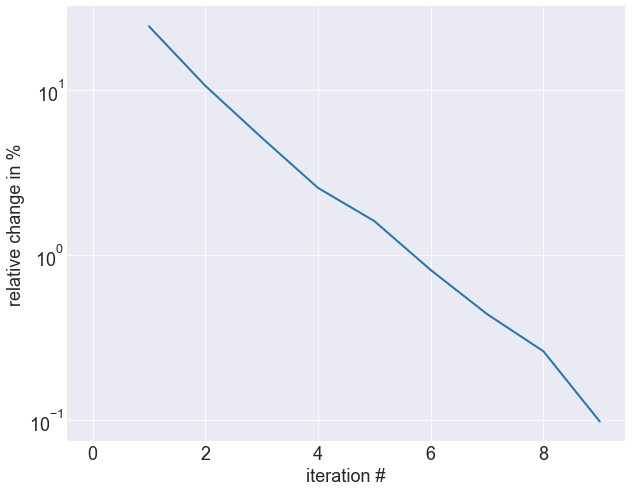

In [5]:
alpha    = 1e-3
phi      = 0.05
om       = np.sqrt(Grav*M_star/r**3)
T_of_phi = lambda phi: Temp.get_t_mid(r,sig_g,sig_d,alpha*np.ones(r.shape),phi=phi)
H_of_T   = lambda T:   np.sqrt(T*(k_b/mu/m_p))/om
T        = dt.tmid.temperature_iterator(r,T_of_phi,H_of_T,do_plot=True,phi_min=0.001)